# Importing libraries

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing

#plotting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#relevant ML libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#warning handle
import warnings
warnings.filterwarnings("ignore")

# Loading dataset

In [16]:
dataset=pd.read_csv('F://loan.csv')

In [17]:
dataset.head()

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,0,5849,0.0,NaN,360.0,1.0,Y
1,LP001003,Male,Yes,Graduate,No,Rural,1,4583,1508.0,128.0,360.0,1.0,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,0,3000,0.0,66.0,360.0,1.0,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,0,2583,2358.0,120.0,360.0,1.0,Y
4,LP001008,Male,No,Graduate,No,Urban,0,6000,0.0,141.0,360.0,1.0,Y


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   Property_Area      614 non-null    object 
 6   Dependents         599 non-null    object 
 7   ApplicantIncome    614 non-null    int64  
 8   CoapplicantIncome  614 non-null    float64
 9   LoanAmount         592 non-null    float64
 10  Loan_Amount_Term   600 non-null    float64
 11  Credit_History     564 non-null    float64
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing

In [19]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Education             0
Self_Employed        32
Property_Area         0
Dependents           15
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
dtype: int64

In [20]:
#filling the missing data
print("Before filling missing values\n\n","#"*50,"\n")
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']


for col in null_cols:
    print(f"{col}:\n{dataset[col].value_counts()}\n","-"*50)
    dataset[col] = dataset[col].fillna(
    dataset[col].dropna().mode().values[0] )   

    
dataset.isnull().sum().sort_values(ascending=False)
print("After filling missing values\n\n","#"*50,"\n")
for col in null_cols:
    print(f"\n{col}:\n{dataset[col].value_counts()}\n","-"*50)

Before filling missing values

 ################################################## 

Credit_History:
1.0    475
0.0     89
Name: Credit_History, dtype: int64
 --------------------------------------------------
Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64
 --------------------------------------------------
LoanAmount:
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64
 --------------------------------------------------
Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
 --------------------------------------------------
Gender:
Male      489
Female    112
Name: Gender, dtype

In [21]:
dataset.drop('Loan_ID',axis=1,inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      614 non-null    object 
 4   Property_Area      614 non-null    object 
 5   Dependents         614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [22]:
print(dataset)

     Gender Married     Education Self_Employed Property_Area Dependents  \
0      Male      No      Graduate            No         Urban          0   
1      Male     Yes      Graduate            No         Rural          1   
2      Male     Yes      Graduate           Yes         Urban          0   
3      Male     Yes  Not Graduate            No         Urban          0   
4      Male      No      Graduate            No         Urban          0   
..      ...     ...           ...           ...           ...        ...   
609  Female      No      Graduate            No         Rural          0   
610    Male     Yes      Graduate            No         Rural         3+   
611    Male     Yes      Graduate            No         Urban          1   
612    Male     Yes      Graduate            No         Urban          2   
613  Female      No      Graduate           Yes     Semiurban          0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             

## Encoding to numeric

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
dataset['Loan_Status'] = label_encoder.fit_transform(dataset['Loan_Status'])
dataset['Married'] = label_encoder.fit_transform(dataset['Married'])
dataset['Education'] = label_encoder.fit_transform(dataset['Education'])
dataset['Dependents'] = label_encoder.fit_transform(dataset['Dependents'])
dataset['Self_Employed'] = label_encoder.fit_transform(dataset['Self_Employed'])
dataset['Property_Area'] = label_encoder.fit_transform(dataset['Property_Area'])
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

In [24]:
print(dataset)

     Gender  Married  Education  Self_Employed  Property_Area  Dependents  \
0         1        0          0              0              2           0   
1         1        1          0              0              0           1   
2         1        1          0              1              2           0   
3         1        1          1              0              2           0   
4         1        0          0              0              2           0   
..      ...      ...        ...            ...            ...         ...   
609       0        0          0              0              0           0   
610       1        1          0              0              0           3   
611       1        1          0              0              2           1   
612       1        1          0              0              2           2   
613       0        0          0              1              1           0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0 

## Correlation table

In [25]:
corr = dataset.corr()
corr.style.background_gradient().set_precision(2)

,Gender,Married,Education,Self_Employed,Property_Area,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Gender,1.00,0.36,0.05,-0.00,-0.03,0.17,0.06,0.08,0.11,-0.07,0.01,0.02
Married,0.36,1.00,0.01,0.00,0.00,0.33,0.05,0.08,0.15,-0.10,0.01,0.09
Education,0.05,0.01,1.00,-0.01,-0.07,0.06,-0.14,-0.06,-0.17,-0.07,-0.07,-0.09
Self_Employed,-0.00,0.00,-0.01,1.00,-0.03,0.06,0.13,-0.02,0.11,-0.03,-0.00,-0.00
Property_Area,-0.03,0.00,-0.07,-0.03,1.00,-0.00,-0.01,0.01,-0.05,-0.08,0.00,0.03
Dependents,0.17,0.33,0.06,0.06,-0.00,1.00,0.12,0.03,0.16,-0.10,-0.04,0.01
ApplicantIncome,0.06,0.05,-0.14,0.13,-0.01,0.12,1.00,-0.12,0.56,-0.05,-0.02,-0.00
CoapplicantIncome,0.08,0.08,-0.06,-0.02,0.01,0.03,-0.12,1.00,0.19,-0.06,0.01,-0.06
LoanAmount,0.11,0.15,-0.17,0.11,-0.05,0.16,0.56,0.19,1.00,0.04,-0.00,-0.03
Loan_Amount_Term,-0.07,-0.10,-0.07,-0.03,-0.08,-0.10,-0.05,-0.06,0.04,1.00,-0.00,-0.02


## Splitting target data from the dataframe

In [26]:
x=dataset.iloc[:,1:11].values
X = pd.DataFrame(x)
y=dataset.iloc[:,11].values
Y=pd.DataFrame(y)

In [27]:
X

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,2.0,0.0,5849.0,0.0,120.0,360.0,1.0
1,1.0,0.0,0.0,0.0,1.0,4583.0,1508.0,128.0,360.0,1.0
2,1.0,0.0,1.0,2.0,0.0,3000.0,0.0,66.0,360.0,1.0
3,1.0,1.0,0.0,2.0,0.0,2583.0,2358.0,120.0,360.0,1.0
4,0.0,0.0,0.0,2.0,0.0,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.0,360.0,1.0
610,1.0,0.0,0.0,0.0,3.0,4106.0,0.0,40.0,180.0,1.0
611,1.0,0.0,0.0,2.0,1.0,8072.0,240.0,253.0,360.0,1.0
612,1.0,0.0,0.0,2.0,2.0,7583.0,0.0,187.0,360.0,1.0


# Applying Machine learning models

## Spliting training and testing data

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

## Decision tree

In [29]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_test,y_predict)
print('accuracy is',accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52        39
           1       0.78      0.75      0.76        84

    accuracy                           0.68       123
   macro avg       0.64      0.64      0.64       123
weighted avg       0.69      0.68      0.69       123

accuracy is 0.6829268292682927


## Logistic Regression

In [30]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_test,y_predict)
print('accuracy is',accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.41      0.56        39
           1       0.78      0.98      0.87        84

    accuracy                           0.80       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.82      0.80      0.77       123

accuracy is 0.7967479674796748


## Naive Bayes :-

In [31]:
from sklearn.naive_bayes import GaussianNB
classifier1 = GaussianNB()
classifier1.fit(X_train, y_train)
y_pred1 = classifier1.predict(X_test)
NB_SC = accuracy_score(y_predict,y_test)
accuracy_score(y_test, y_pred1)

0.7967479674796748

## SVM (rbf kernel) :-

In [32]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'rbf', random_state = 0)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)
KSVM_SC=accuracy_score(y_test, y_pred2)
accuracy_score(y_test, y_pred2)

0.6747967479674797

## SVM (Liner Kernel):-

In [33]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear', random_state = 0)
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)
LSVM_SC=accuracy_score(y_test, y_pred3)
accuracy_score(y_test, y_pred3)

0.8048780487804879

## Comparison

In [34]:
acc = [DT_SC,LR_SC,NB_SC,KSVM_SC,LSVM_SC]
Models = pd.DataFrame({
    'Algorithm': ["Decision Tree", "Logistic Regression","Naive Bayes","Kernel SVM","Liner SVM"],
    'Accuracy': acc})
Models

,Algorithm,Accuracy
0,Decision Tree,0.682927
1,Logistic Regression,0.796748
2,Naive Bayes,0.796748
3,Kernel SVM,0.674797
4,Liner SVM,0.804878


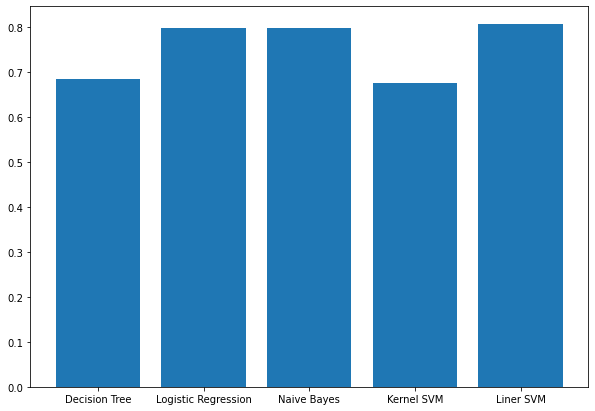

In [35]:
algorithm = Models['Algorithm']
accuracy = Models['Accuracy']
  
# Figure Size 
fig = plt.figure(figsize =(10, 7)) 
  
# Horizontal Bar Plot 
plt.bar(algorithm, accuracy) 
  
# Show Plot 
plt.show()

## Data Visualization

(0.0, 120.0)

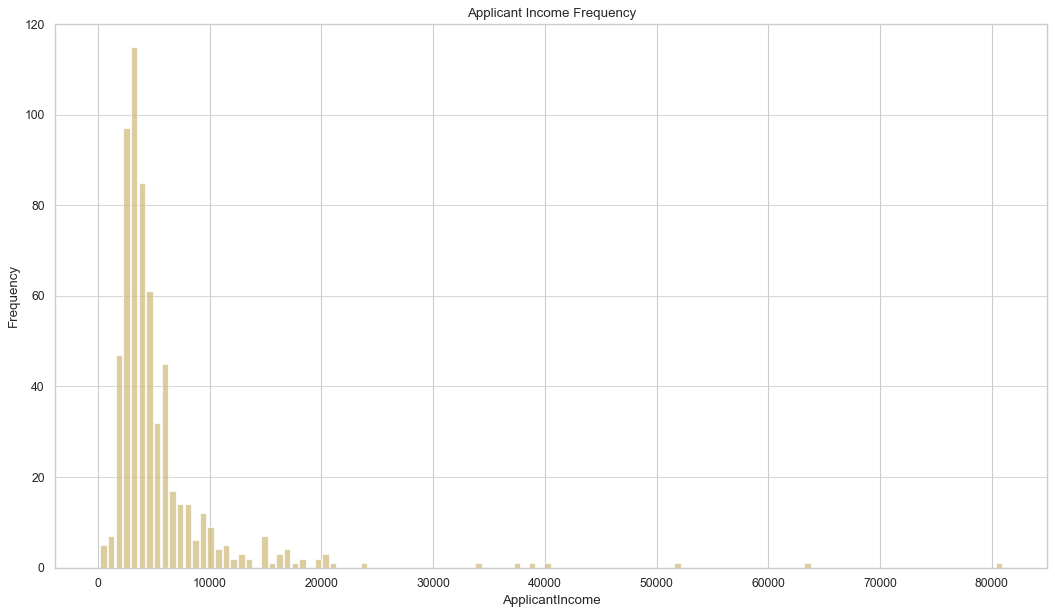

In [23]:
plt.figure(figsize=(16,9), dpi= 80)
n, bins, patches = plt.hist(x=dataset['ApplicantIncome'], bins='auto',
                            color='y',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.title('Applicant Income Frequency')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

Text(0.5, 1, 'Loan Status of people')

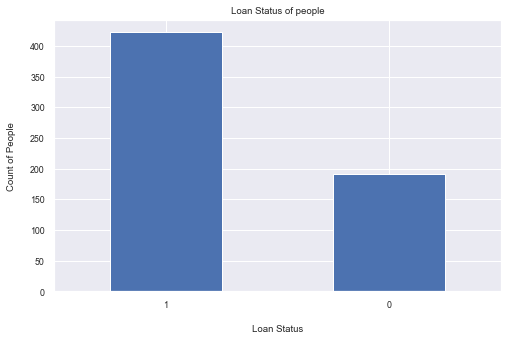

In [34]:
dataset['Loan_Status'].value_counts().plot(kind='bar').set_title('Loan Status') 
sns.set(font_scale=0.8)
dataset['Loan_Status'].value_counts().plot(kind='bar', figsize=(8, 5), rot=0)
plt.xlabel("Loan Status", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Loan Status of people", y=1)

## Confusion Matrix - Logistic Regression

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[16 23]
 [ 2 82]]
